In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wine=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\Wine1 (1).data")
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Colour_Intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivar
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
print(wine['Alcohol'].unique())

[1 2 3]


In [4]:
x=wine.drop(['Alcohol'],axis=1).values
x.shape

(178, 13)

In [5]:
y=wine['Alcohol'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [6]:
x1=wine[['Proline','Colour_Intensity']].values
import sklearn.model_selection as ms
xtrain,xtest,ytrain,ytest=ms.train_test_split(x1,y,test_size=0.3,random_state=22)

In [7]:
from sklearn import svm
svmclassifier=svm.SVC()
cval=2.**np.arange(-1,1.2,step=0.2)
cval

array([0.5       , 0.57434918, 0.65975396, 0.75785828, 0.87055056,
       1.        , 1.14869835, 1.31950791, 1.51571657, 1.74110113,
       2.        ])

In [8]:
n_grid=[{'C':cval}]
from sklearn.model_selection import GridSearchCV
cv_svc=GridSearchCV(estimator=svmclassifier,param_grid=n_grid,cv=ms.KFold(n_splits=100))
cv_svc.fit(xtrain,ytrain)
best_c=cv_svc.best_params_['C']
best_c

1.319507910772894

In [10]:
cv_clfc=svm.SVC(C=best_c)
cv_clf.fit(xtrain,ytrain)

NameError: name 'cv_clf' is not defined

In [11]:
predict=cv_svc.predict(xtest)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        16
           2       0.62      0.53      0.57        19
           3       0.86      1.00      0.93        19

    accuracy                           0.72        54
   macro avg       0.70      0.72      0.71        54
weighted avg       0.71      0.72      0.71        54



In [20]:
svc=svm.SVC(kernel='linear',C=best_c).fit(xtrain,ytrain)
svc_rbf=svm.SVC(kernel='rbf',C=best_c).fit(xtrain,ytrain)
svc_poly=svm.SVC(kernel='poly',C=best_c,degree=3).fit(xtrain,ytrain)
svc_lin=svm.LinearSVC(C=best_c).fit(xtrain,ytrain)

C:\Users\archa\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [21]:
x1

array([[3.92, 2.29],
       [3.4 , 1.28],
       [3.17, 2.81],
       [3.45, 2.18],
       [2.93, 1.82],
       [2.85, 1.97],
       [3.58, 1.98],
       [3.58, 1.25],
       [2.85, 1.98],
       [3.55, 1.85],
       [3.17, 2.38],
       [2.82, 1.57],
       [2.9 , 1.81],
       [2.73, 2.81],
       [3.  , 2.96],
       [2.88, 1.46],
       [2.65, 1.97],
       [2.57, 1.72],
       [2.82, 1.86],
       [3.36, 1.66],
       [3.71, 2.1 ],
       [3.52, 1.98],
       [4.  , 1.69],
       [3.63, 1.46],
       [3.82, 1.66],
       [3.2 , 1.92],
       [3.22, 1.45],
       [2.77, 1.35],
       [3.4 , 1.76],
       [3.59, 1.98],
       [2.71, 2.38],
       [2.88, 1.95],
       [2.87, 1.97],
       [3.  , 1.35],
       [2.87, 1.54],
       [3.47, 1.86],
       [2.78, 1.36],
       [2.51, 1.44],
       [2.69, 1.37],
       [3.53, 2.08],
       [3.38, 2.34],
       [3.  , 1.48],
       [3.56, 1.7 ],
       [3.  , 1.66],
       [3.35, 2.03],
       [3.33, 1.25],
       [3.44, 2.19],
       [3.33,

In [23]:
x_min,x_max=x1[:,0].min()-1,x1[:,0].max()+1
y_min,y_max=x1[:,1].min()-1,x1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.2),np.arange(y_min,y_max,0.2))
xx.shape

(26, 24)

In [24]:
titles=['SVC with linear kernel',
       'LinearSVC (linear kernel)',
       'SVC eith RBF kernel',
       'SVC with polynomial(degree 3) kernel']

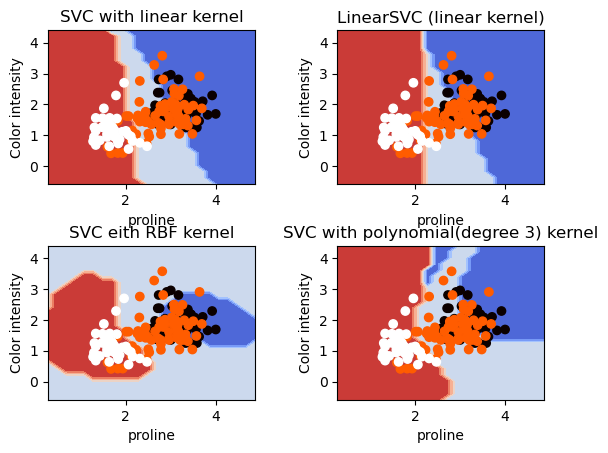

In [29]:
for i,clf in enumerate((svc,svc_lin,svc_rbf,svc_poly)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
#     print(z.shape)
    z=z.reshape(xx.shape)
#     print(z.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm)
    plt.scatter(x1[:,0],x1[:,1],c=y,cmap='hot')
    plt.xlabel('proline')
    plt.ylabel('Color intensity')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(titles[i])